In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
!pip install chardet

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import csv
from collections import Counter
import pandas as pd
import chardet

##Grafica de barras

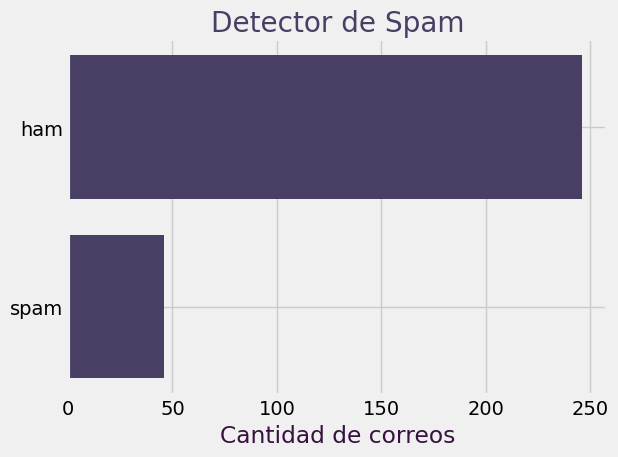

In [ ]:
plt.style.use("fivethirtyeight")

with open('/content/spam_spanish.csv', 'rb') as f:
  encoding = chardet.detect(f.read())['encoding']

with open('/content/spam_spanish.csv', encoding=encoding) as csv_file:
  csv_reader = csv.DictReader(csv_file)
  spam_counter = Counter()

  for row in csv_reader:
    spam_counter.update(row['label'].split(';'))

label = []
text = []

for item in spam_counter.most_common(2):
  label.append(item[0])
  text.append(item[1])

label.reverse()
text.reverse()

plt.barh(label, text, color= '#493e63')

#plt.ylabel('Programming Languages')
plt.xlabel('Cantidad de correos', color= '#391140')
plt.title('Detector de Spam', color='#493e63')



plt.tight_layout()


plt.show()

##Grafica de Pastel

In [38]:
print(spam_counter)

Counter({'ham': 246, 'spam': 46})


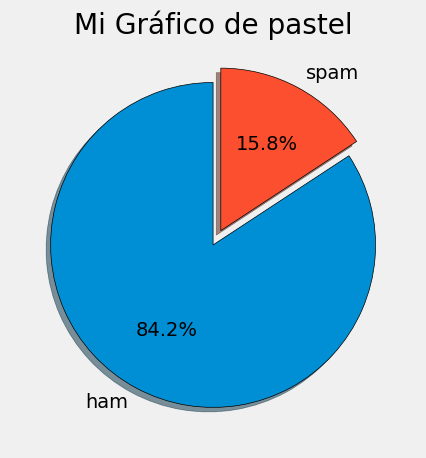

In [39]:
plt.style.use("fivethirtyeight")

# Language Popularity
labels = ['ham', 'spam']
slices = [246, 46]
explode = [0, 0.1]

plt.pie(slices, labels = labels, explode= explode, shadow= True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})


plt.title('Mi Gráfico de pastel')
plt.tight_layout()
plt.show()

#colores
#Blue = #008fd5
#Red = #fc4f30
#yellow = #e5ae37
#Green = #69904f

##Detector de spam

In [ ]:
spam_or_ham = pd.read_csv("spam_spanish.csv", encoding='latin-1')[["label", "text"]]
spam_or_ham.columns = ["label", "text"]
spam_or_ham.head()

,label,text
0,ham,Dime algo. Esta bien.
1,ham,De acuerdo
2,ham,Mmm. ¿Traigo una botella de vino para entreten...
3,ham,Esta es tu prueba facial (1 2 3 4 5 6 7 8 9 <#...
4,ham,"Oye, iouri me dio tu número, soy Wylie, la ami..."


In [ ]:
spam_or_ham["label"].value_counts()

ham     246
spam     46
Name: label, dtype: int64

In [ ]:
import string
punctuation = set(string.punctuation)
def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [ ]:
spam_or_ham.head()["text"].apply(tokenize)

0                             [dime, algo, esta, bien]
1                                        [de, acuerdo]
2    [mmm, ¿traigo, una, botella, de, vino, para, e...
3    [esta, es, tu, prueba, facial, 1, 2, 3, 4, 5, ...
4    [oye, iouri, me, dio, tu, número, soy, wylie, ...
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
demo_vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary = True
)

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(spam_or_ham["text"], spam_or_ham["label"], stratify=spam_or_ham["label"])
print(f"Ejemplos de entrenamiento: {len(train_text)}, ejemplos de prueba {len(test_text)}")

Ejemplos de entrenamiento: 219, ejemplos de prueba 73


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(train_X, train_labels)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score
predicciones = classifier.predict(test_X)
accuracy = accuracy_score(test_labels, predicciones)
print(f"Accuracy: {accuracy:.4%}")

Accuracy: 93.1507%


In [ ]:

frases = [
  '¿Está buscando rediseñar su sitio web con una nueva apariencia y sensación modernas?',
  'Por favor envíeme una confirmación de eliminación completa y permanente de los datos personales.',
  'Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio',
  'Nos comunicamos con usted porque el punto final del webhook asociado con su cuenta en modo de prueba ha fallado.',
  'Confirma tu cuenta de Facebook en el siguiente enlace',
  'Has sido seleccionado para participar en un servicio gratuito.'
]


In [ ]:
frases_X = real_vectorizer.transform(frases)
predicciones = classifier.predict(frases_X)

In [ ]:
for text, label in zip(frases, predicciones):
  print(f"{label:5} - {text}")

ham   - ¿Está buscando rediseñar su sitio web con una nueva apariencia y sensación modernas?
ham   - Por favor envíeme una confirmación de eliminación completa y permanente de los datos personales.
spam  - Has sido seleccionado para ganar una suscripción GRATUITA a nuestro servicio
ham   - Nos comunicamos con usted porque el punto final del webhook asociado con su cuenta en modo de prueba ha fallado.
ham   - Confirma tu cuenta de Facebook en el siguiente enlace
ham   - Has sido seleccionado para participar en un servicio gratuito.
